In [ ]:
# import os
# from quickda.explore_data import *
# from quickda.clean_data import *
# # from quickda.explore_numeric import *
# # from quickda.explore_categoric import *
# # from quickda.explore_numeric_categoric import *
# # from quickda.explore_time_series import *
# import pandas as pd
# import numpy as np

In [ ]:
import os
import pandas as pd
import numpy as np
df = pd.read_csv("../data/Austin housing market data/clean_austin_price_reg_train.csv")
df.drop(columns=['Unnamed: 0',  "property_type_id", "school_rating"], inplace = True)

# to_datetime = 'dt_applied'
# to_categoric = ['delinq_2yrs', 'inq_last_6mths', 'loan_writeoff', 'pub_rec']

df = df.astype({"Year": str, "zip_code":str})
df.fillna(method = 'ffill', inplace=True)
# 

In [ ]:
df.drop_duplicates(subset = ["period_begin", "zip_code", "property_type"], inplace=True)

In [ ]:
#explore(df, method = "profile", report_name="austin_reg_report", is_large_dataset=False)

In [ ]:
df_wo_zip_period = df.drop(columns=['zip_code', 'period_begin'])


In [ ]:
from pycaret.regression import *

In [ ]:
#, 'mobiluty_abroad', 'mobility_withincounty', 'mobility_withinstate', 'mobility_withUS
#df_wo_zip_period['Unemployment'] = df_wo_zip_period['Unemployment'].str[:-1].astype(float)/100
df_wo_zip_period['mobility_abroad'] = df_wo_zip_period['mobility_abroad'].str[:-1].astype(float)/100
df_wo_zip_period['mobility_withincounty'] = df_wo_zip_period['mobility_withincounty'].str[:-1].astype(float)/100
df_wo_zip_period['mobility_withinstate'] = df_wo_zip_period['mobility_withinstate'].str[:-1].astype(float)/100
df_wo_zip_period['mobility_withUS'] = df_wo_zip_period['mobility_withUS'].str[:-1].astype(float)/100
df_wo_zip_period.head(1)

In [16]:
demo = setup(data = df_wo_zip_period, target = 'median_sale_price', 
                   ignore_features = ['median_list_price','median_ppsf','median_list_ppsf','Year'], normalize = True,
                   transformation= False, transformation_method = 'yeo-johnson', 
                   categorical_features = ['property_type'], numeric_features=['median_income', 'Unemployment', 'mobility_abroad', 'mobility_withincounty', 'mobility_withinstate', 'mobility_withUS'],
                   transform_target = True, remove_outliers= False, 
                   remove_multicollinearity = True,
                   ignore_low_variance = True, combine_rare_levels = True) 

,Description,Value
0,session_id,8497
1,Target,median_sale_price
2,Original Data,"(7685, 23)"
3,Missing Values,False
4,Numeric Features,17
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(5379, 20)"


In [17]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,38252.7776,6008833122.6483,77128.8059,0.8537,0.1759,0.1095,1.0040
lightgbm,Light Gradient Boosting Machine,46324.4748,6559071761.3126,80675.7794,0.8407,0.1874,0.1324,0.1170
rf,Random Forest Regressor,42639.2504,6690047128.7762,81249.7527,0.8380,0.1826,0.1217,1.7480
gbr,Gradient Boosting Regressor,65330.9232,11075377610.4565,104982.4325,0.7324,0.2455,0.1885,0.5710
dt,Decision Tree Regressor,56957.6362,12800321055.2921,112552.5928,0.6826,0.2586,0.1662,0.0540
knn,K Neighbors Regressor,65970.4029,13431292951.8936,115536.3462,0.6753,0.2629,0.1867,0.1230
ada,AdaBoost Regressor,89597.9627,17909910440.3607,133544.0578,0.5681,0.3197,0.2649,0.3200
lr,Linear Regression,89033.3336,18340492288.0000,135126.2914,0.5585,0.3213,0.2571,0.0150
lar,Least Angle Regression,89033.3354,18340476094.7943,135126.2367,0.5585,0.3213,0.2571,0.0190
ridge,Ridge Regression,89033.7961,18343473766.4000,135137.3367,0.5584,0.3213,0.2571,0.0090


In [18]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,39334.7431,5357973905.9332,73198.1824,0.8714,0.1826,0.1160
1,38283.8050,4801981935.3440,69296.3342,0.8936,0.1665,0.1105
2,43589.5842,6915980350.6279,83162.3734,0.8148,0.2068,0.1240
3,41895.1295,6500545625.5697,80625.9612,0.8657,0.1694,0.1089
4,33957.2750,3754428785.8866,61273.3938,0.8966,0.1727,0.1067
5,35204.7265,5921894622.6903,76953.8474,0.8763,0.1582,0.0967
6,41909.9685,7972855153.8553,89290.8459,0.8097,0.1839,0.1132
7,36043.7432,6466839324.4500,80416.6607,0.7975,0.1808,0.1110
8,33483.7951,5335694236.9277,73045.8365,0.8713,0.1634,0.1000


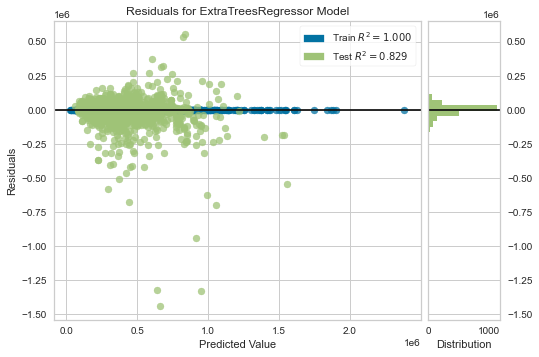

In [19]:
plot_model(et)